In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import xgboost as xgb

In [98]:
# Load dataset
data = pd.read_csv('marketing_campaign.xls',sep='\t')


In [99]:
#Code to display full rows and coluuns of the dataset
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [100]:
# Step 1: Handle missing values
data = data.dropna()
data.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1


In [101]:
# Step 3: Prepare the data
X = data[['Recency', 'Complain', 'MntWines', 'MntFruits', 'MntMeatProducts', 
           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
           'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 
           'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
           'NumWebPurchases', 'NumWebVisitsMonth']]

y = data['Response']  # Assuming 'Response' is your target variable


In [102]:
# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
# Step 6: Train the XGBoost model
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


C:\Users\hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:43:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [104]:
# Step 7: Predict on the test set
y_pred = model.predict(X_test)


In [105]:
# Step 8: Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8616541353383459
[[539  30]
 [ 62  34]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       569
           1       0.53      0.35      0.42        96

    accuracy                           0.86       665
   macro avg       0.71      0.65      0.67       665
weighted avg       0.84      0.86      0.85       665



In [106]:
# Step 9: Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Class 1 as non-churn
print('AUC-ROC:', roc_auc)

AUC-ROC: 0.8545694200351495


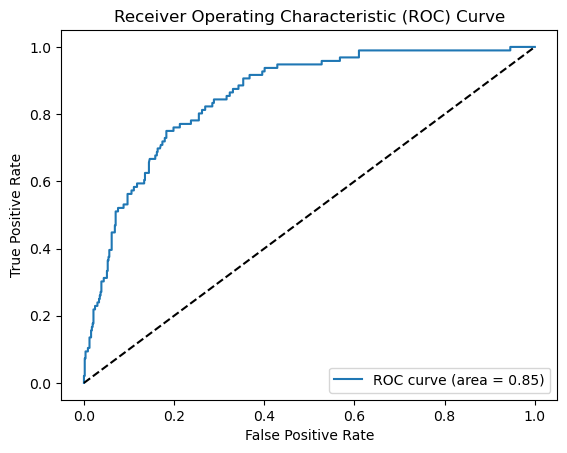

In [107]:
# Step 10: Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [108]:
# Step 11: Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

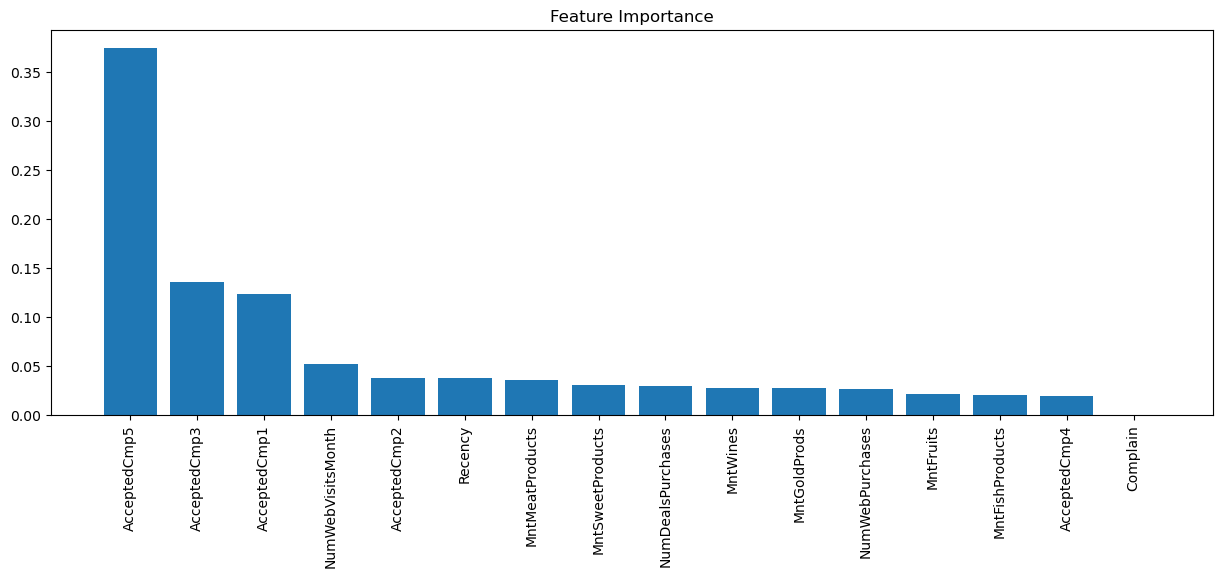

In [109]:

# Plot feature importance
plt.figure(figsize=(15, 5))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()


In [110]:
# Step 12: Prediction on the entire dataset
data['churn_Probability'] = model.predict_proba(X)[:, 0]  # Class 0 as churn
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,churn_Probability
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.141038
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.997839
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.982235
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.999780
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.982089
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,0.994925
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,0.991629
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,0.914288
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,0.496718
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,0.987323


In [111]:
#Filter the data for IDs with a churn probability greater than 0.8
high_churn_prob = data[data['churn_Probability'] > 0.75][['ID', 'churn_Probability']]
print(high_churn_prob.reset_index(drop=True))

         ID  churn_Probability
0      2174           0.997839
1      4141           0.982235
2      6182           0.999780
3      5324           0.982089
4      7446           0.994925
5       965           0.991629
6      6177           0.914288
7      5899           0.987323
8       387           0.998034
9      2125           0.995695
10     8180           0.993509
11     2569           0.998669
12     9736           0.999126
13     4939           0.999424
14     6565           0.952284
15     2278           0.997842
16     9360           0.980669
17     5376           0.922150
18     1993           0.991325
19     4047           0.994687
20     1409           0.998995
21     7892           0.996648
22     2404           0.961085
23     9422           0.998442
24     1966           0.972199
25     6864           0.999820
26     3033           0.996181
27     5710           0.999575
28     8755           0.833645
29    10738           0.999856
30     4339           0.999252
31    10